# Association between patient features on use of thrombolysis

## Aims

Examine thrombolysis use (in all arrivals, and the subset of those who arrive within 4 hours of known onset) according to:

* Disability (Rankin) before stroke
* Stroke severity (NIHSS)
* Gender
* Ethnicity
* Age group
* Onset known
* Arrival by ambulance

Examine thrombolysis use in the absence and presence of co-morbidities. 

Note: The association of particular features with use of thrombolysis does not imply that these relationships are causal.

Examine reasons given for not giving thrombolysis.

## Import libraries and data

Data has been resticted to stroke teams with at least 300 admissions, with at least 10 patients receiving thrombolysis, over three years.

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# import data
raw_data = pd.read_csv(
    './../data/2019-11-04-HQIP303-Exeter_MA.csv', low_memory=False)

In [2]:
headings = list(raw_data)
print (headings)

['StrokeTeam', 'PatientUID', 'Pathway', 'S1AgeOnArrival', 'MoreEqual80y', 'S1Gender', 'S1Ethnicity', 'S1OnsetInHospital', 'S1OnsetToArrival_min', 'S1OnsetDateType', 'S1OnsetTimeType', 'S1ArriveByAmbulance', 'S1AdmissionHour', 'S1AdmissionDay', 'S1AdmissionQuarter', 'S1AdmissionYear', 'CongestiveHeartFailure', 'Hypertension', 'AtrialFibrillation', 'Diabetes', 'StrokeTIA', 'AFAntiplatelet', 'AFAnticoagulent', 'AFAnticoagulentVitK', 'AFAnticoagulentDOAC', 'AFAnticoagulentHeparin', 'S2INR', 'S2INRHigh', 'S2INRNK', 'S2NewAFDiagnosis', 'S2RankinBeforeStroke', 'Loc', 'LocQuestions', 'LocCommands', 'BestGaze', 'Visual', 'FacialPalsy', 'MotorArmLeft', 'MotorArmRight', 'MotorLegLeft', 'MotorLegRight', 'LimbAtaxia', 'Sensory', 'BestLanguage', 'Dysarthria', 'ExtinctionInattention', 'S2NihssArrival', 'S2BrainImagingTime_min', 'S2StrokeType', 'S2Thrombolysis', 'Haemorrhagic', 'TimeWindow', 'Comorbidity', 'Medication', 'Refusal', 'Age', 'Improving', 'TooMildSevere', 'TimeUnknownWakeUp', 'OtherMedical

## Restrict original data to hospitals with at least 300 admissions + 10 thrombolysis patients

In [3]:
keep = []

groups = raw_data.groupby('StrokeTeam') # creates a new object of groups of data

for index, group_df in groups: # each group has an index and a dataframe of data
    
    # Skip if total admissions less than 300 or total thrombolysis < 10
    admissions = group_df.shape[0]
    thrombolysis_received = group_df['S2Thrombolysis'] == 'Yes' 
    if (admissions < 300) or (thrombolysis_received.sum() < 10):
        continue
    
    else: 
        keep.append(group_df)

# Concatenate output
data = pd.DataFrame()
data = pd.concat(keep)

# Convert thromboilysis to boolean
data['thrombolysis_given'] = data['S2Thrombolysis'] == 'Yes'

print (data.shape)

(239505, 63)


## Get out-of-hopsital stroke onset arrivals within 4 hours of known stroke onset

In [4]:
# Get out of hospital arrivals
mask = data['S1OnsetInHospital'] == 'No'
data = data[mask]

# Get arrivals within 4 hours of known stroke onset
mask = data['S1OnsetToArrival_min'] <= 240
data_4hr = data[mask]

## Breakdown of thrombolysis use by feature

### Rankin before stroke

In [5]:
# All admissions
rankin_before_stroke_all = \
    data.groupby('S2RankinBeforeStroke').mean()['thrombolysis_given']
rankin_before_stroke_all.rename('All', inplace=True)

# Admissions within 4 hours of arrival
rankin_before_stroke_4hr = \
    data_4hr.groupby('S2RankinBeforeStroke').mean()['thrombolysis_given']
rankin_before_stroke_4hr.rename('4hr', inplace=True)

# Combine
rankin_before_stroke = \
    pd.concat([rankin_before_stroke_all, rankin_before_stroke_4hr], axis=1)
rankin_before_stroke = rankin_before_stroke.round(3)
rankin_before_stroke *= 100

In [6]:
rankin_before_stroke

,All,4hr
S2RankinBeforeStroke,,
0,14.2,34.9
1,10.8,28.6
2,9.0,24.0
3,8.7,21.5
4,6.5,15.0
5,4.3,9.8


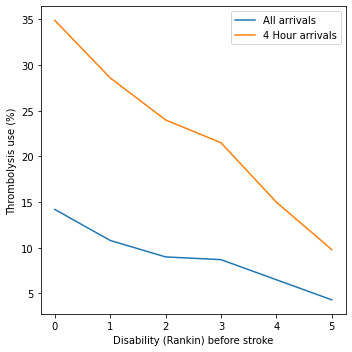

In [7]:
# Set up figure
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
x = rankin_before_stroke.index
y1 = rankin_before_stroke['All']
y2 = rankin_before_stroke['4hr'] 
ax.plot(x, y1, label='All arrivals')
ax.plot(x, y2, label='4 Hour arrivals')
ax.set_xlabel('Disability (Rankin) before stroke')
ax.set_ylabel('Thrombolysis use (%)')
ax.legend()
plt.tight_layout()
plt.savefig('output/thrombolysis_use_by_rankin_before_stroke.jpg', dpi=300)
plt.show()

### Stroke severity

In [8]:
# All admissions
NIHSS_all = data.groupby('S2NihssArrival').mean()['thrombolysis_given']
NIHSS_all.rename('All', inplace=True)

# Admissions within 4 hours of arrival
NIHSS_4hr = data_4hr.groupby('S2NihssArrival').mean()['thrombolysis_given']
NIHSS_4hr.rename('4hr', inplace=True)

# Combine
NIHSS = pd.concat([NIHSS_all, NIHSS_4hr], axis=1) * 100
NIHSS = NIHSS.round(1)

In [9]:
NIHSS

,All,4hr
S2NihssArrival,,
0.0,0.6,2.1
1.0,1.1,3.8
2.0,2.5,8.3
3.0,4.9,15.0
4.0,9.7,28.7
5.0,14.0,36.8
6.0,16.4,39.9
7.0,18.8,42.4
8.0,21.0,44.7


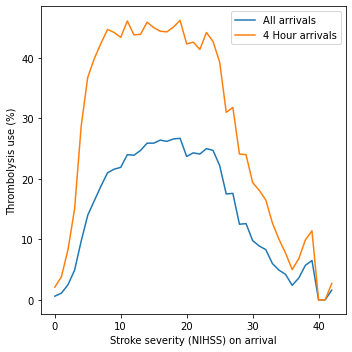

In [10]:
# Set up figure
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
x = NIHSS.index
y1 = NIHSS['All']
y2 = NIHSS['4hr'] 
ax.plot(x, y1, label='All arrivals')
ax.plot(x, y2, label='4 Hour arrivals')
ax.set_xlabel('Stroke severity (NIHSS) on arrival')
ax.set_ylabel('Thrombolysis use (%)')
ax.legend()

plt.tight_layout()
plt.savefig('output/thrombolysis_use_by_arrival_nihss.jpg', dpi=300)
plt.show()

### Gender

In [11]:
# All admissions
gender_all = data.groupby('S1Gender').mean()['thrombolysis_given']
gender_all.rename('All', inplace=True)

# Admissions within 4 hours of arrival
gender_4hr = data_4hr.groupby('S1Gender').mean()['thrombolysis_given']
gender_4hr.rename('4hr', inplace=True)

# Combine
gender = pd.concat([gender_all, gender_4hr], axis=1) * 100
gender = gender.round(1)

In [12]:
gender

,All,4hr
S1Gender,,
Female,11.3,28.2
Male,12.3,30.8


### Ethnicity

In [13]:
# All admissions
ethnicity_all = data.groupby('S1Ethnicity').mean()['thrombolysis_given']
ethnicity_all.rename('All', inplace=True)

# Admissions within 4 hours of arrival
ethnicity_4hr = data_4hr.groupby('S1Ethnicity').mean()['thrombolysis_given']
ethnicity_4hr.rename('4hr', inplace=True)

# Combine
ethnicity = pd.concat([ethnicity_all, ethnicity_4hr], axis=1) * 100
ethnicity = ethnicity.round(1)

In [14]:
ethnicity

,All,4hr
S1Ethnicity,,
Asian,12.1,30.0
Black,10.2,29.2
Mixed,11.7,32.3
Other,14.4,34.3
White,11.6,29.1


### Age group

In [15]:
# All admissions
age_group_all = data.groupby('S1AgeOnArrival').mean()['thrombolysis_given']
age_group_all.rename('All', inplace=True)

# Admissions within 4 hours of arrival
age_group_4hr = data_4hr.groupby('S1AgeOnArrival').mean()['thrombolysis_given']
age_group_4hr.rename('4hr', inplace=True)

# Combine
age_group = pd.concat([age_group_all, age_group_4hr], axis=1) * 100
age_group = age_group.round(3)

# Re-order
order = ['[15,20)', '[20,25)', '[25,30)', '[30,35)', '[35,40)',
       '[40,45)', '[45,50)', '[50,55)', '[55,60)', '[60,65)', '[65,70)',
       '[70,75)', '[75,80)', '[80,85)', '[85,90)', '[90,95)', '[95,100)',
        '[100,120]']
age_group = age_group.loc[order]
age_group.set_index(np.arange(15, 101, 5), inplace=True)

In [16]:
age_group

,All,4hr
15,17.470,42.029
20,13.402,33.621
25,15.371,37.229
30,14.624,36.164
35,15.697,36.794
40,15.274,37.671
45,14.863,36.277
50,14.189,36.692
55,13.091,34.348
60,12.642,33.238


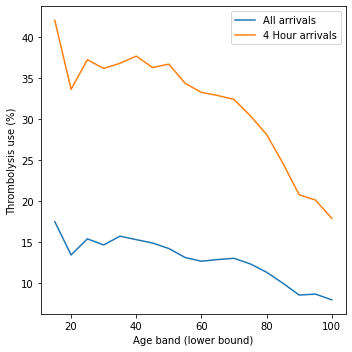

In [17]:
# Set up figure
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
x = age_group.index
y1 = age_group['All']
y2 = age_group['4hr']
ax.plot(x, y1, label='All arrivals')
ax.plot(x, y2, label='4 Hour arrivals')
ax.set_xlabel('Age band (lower bound)')
ax.set_ylabel('Thrombolysis use (%)')
ax.legend()
plt.tight_layout()
plt.savefig('output/thrombolysis_use_by_age.jpg', dpi=300)
plt.show()

### Onset known
Get fractions for each onset type

In [18]:
counts = data.groupby('S1OnsetTimeType').count()['StrokeTeam']
fractions = counts/counts.sum() * 100
fractions = fractions.round(1)
fractions

S1OnsetTimeType
Best estimate    33.7
Not known        33.1
Precise          33.1
Name: StrokeTeam, dtype: float64

In [19]:
# All admissions
onset_known_all = data.groupby('S1OnsetTimeType').mean()['thrombolysis_given']
onset_known_all.rename('All', inplace=True)

# Admissions within 4 hours of arrival
onset_known_4hr = data_4hr.groupby('S1OnsetTimeType').mean()['thrombolysis_given']
onset_known_4hr.rename('4hr', inplace=True)

# Combine
onset_known = pd.concat([onset_known_all, onset_known_4hr], axis=1) * 100
onset_known = onset_known.round(1)

# Re-order
order = ['Not known', 'Best estimate', 'Precise']
onset_known = onset_known.loc[order]

In [20]:
onset_known

,All,4hr
Not known,0.4,NaN
Best estimate,6.3,14.0
Precise,28.8,39.0


### Arrival by ambulance

In [21]:
arrive_by_ambo = np.mean(data['S1ArriveByAmbulance'] == 'Yes') * 100
print (f'Percent arriving by ambulance: {arrive_by_ambo:0.1f}')

Percent arriving by ambulance: 81.4


In [22]:
# All admissions
ambulance_all = data.groupby('S1ArriveByAmbulance').mean()['thrombolysis_given']
ambulance_all.rename('All', inplace=True)

# Admissions within 4 hours of arrival
ambulance_4hr = data_4hr.groupby('S1ArriveByAmbulance').mean()['thrombolysis_given']
ambulance_4hr.rename('4hr', inplace=True)

# Combine
ambulance = pd.concat([ambulance_all, ambulance_4hr], axis=1) * 100
ambulance = ambulance.round(1)

In [23]:
ambulance

,All,4hr
S1ArriveByAmbulance,,
No,3.8,21.4
Yes,13.7,30.3


### Thrombolysis use by comorbidities

Only examine effect of comorbidity on thrombolysis use of those arriving within 4 hours of known onset.

Analyse by comorbidity 'Yes' or 'No'. Ignore 'No but'.

In [24]:
comords = ['CongestiveHeartFailure', 'Hypertension', 'AtrialFibrillation', 
           'Diabetes', 'StrokeTIA', 'AFAntiplatelet', 'AFAnticoagulent', 
           'AFAnticoagulentVitK', 'AFAnticoagulentDOAC', 
           'AFAnticoagulentHeparin']

# Loop through comorbidities and get results
results = []
for comord in comords: 
    result = data_4hr.groupby(comord).mean()['thrombolysis_given']
    results.append({'No': result['No'] * 100, 
                    'Yes': result['Yes'] * 100})
    
comord_df = pd.DataFrame(results, index=comords)
comord_df['Ratio'] = comord_df['Yes'] / comord_df['No']
comord_df = comord_df.round(3)

In [25]:
comord_df

,No,Yes,Ratio
CongestiveHeartFailure,29.709,26.081,0.878
Hypertension,30.331,28.826,0.950
AtrialFibrillation,32.034,19.931,0.622
Diabetes,30.066,27.241,0.906
StrokeTIA,32.151,22.506,0.700
AFAntiplatelet,18.455,28.757,1.558
AFAnticoagulent,34.253,8.976,0.262
AFAnticoagulentVitK,31.009,11.942,0.385
AFAnticoagulentDOAC,32.254,5.677,0.176
AFAnticoagulentHeparin,30.068,7.576,0.252


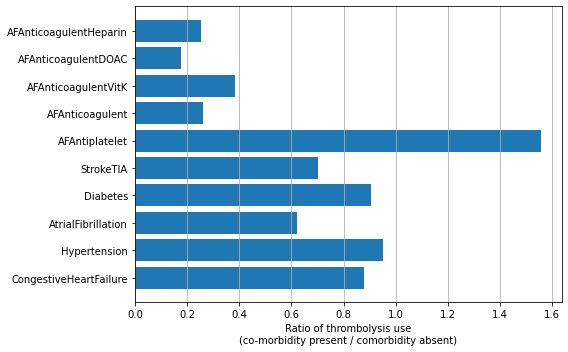

In [26]:
# Set up figure
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()
x = comord_df.index
y = comord_df['Ratio']

ax.barh(x, y)
ax.set_xlabel(
    'Ratio of thrombolysis use\n(co-morbidity present / comorbidity absent)')
ax.grid(axis='x')

plt.tight_layout()
plt.savefig('output/thrombolysis_use_by_comorbidity.jpg', dpi=300)
plt.show()

## Reasons for not giving thrombolysis

Reasons given for not using thrombolysis (more than one may be ticked for each patient).

Only examine reasons for those arriving within 4 hours of known onset.


In [27]:
reasons = ['Haemorrhagic', 'TimeWindow', 'Comorbidity', 'Medication', 'Refusal',
           'Age', 'Improving', 'TooMildSevere', 'TimeUnknownWakeUp', 
           'OtherMedical']

# Restrict data to non-thrombolysed patients
mask = data_4hr['thrombolysis_given'] == False
no_thromolysis_4hr = data_4hr[mask]
# Convert Yes/No in reasons to boolean
reasons_boolean = no_thromolysis_4hr[reasons] == 'Yes'
# Get average of 'Yes' values as percentage
reasons = reasons_boolean.mean() * 100
reasons = reasons.round(1)
# Sort by value
reasons.sort_values(ascending=True, inplace=True)

reasons

Refusal               0.9
Age                   1.2
TimeWindow            7.1
Medication            7.7
Comorbidity           9.9
OtherMedical         15.2
TimeUnknownWakeUp    17.5
Improving            17.8
Haemorrhagic         21.7
TooMildSevere        22.0
dtype: float64

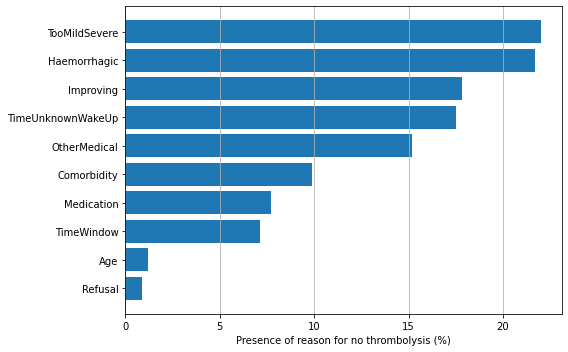

In [28]:
# Set up figure
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()
x = reasons.index
y = reasons.values

ax.barh(x, y)
ax.set_xlabel('Presence of reason for no thrombolysis (%)')
ax.grid(axis='x')

plt.tight_layout()
plt.savefig('output/thrombolysis_non_use_reasons.jpg', dpi=300)
plt.show()

## Observations

* *Disability before stroke:* The higher the level of disability before stroke (as described by the modified Rankin Scale) the lower the use of thrombolysis. As a percentage of all out-of-hospital onset arrivals, thrombolysis use drops from 14.2% in those with no disability before stroke to 4.3% of those with a modified Rankin Scale of 5. As a percentage of out-of-hospital onset arrivals arriving within 4 hours of known stroke onset,  thrombolysis use drops from 34.9% in those with no disability before stroke to 9.8% of those with a modified Rankin Scale of 5.

* *Stroke severity:* The use of thrombolysis varies very significantly with stroke severity (NIHSS) on arrival (Figure 2). Thrombolysis use is very low at extreme NIHSS, withy a plateau of use between NIHSS of approximately 6 to 25.

* *Gender:* There is a small association between gender on use of thrombolysis. 12.3% of all male arrivals receive thrombolysis, compared with 11.3% for females. Of those arriving within 4 hours of known stroke onset 30.8% of all male arrivals receive thrombolysis, compared with 28.2% for females.

* *Ethnicity*: There is some association between ethnicity on thrombolysis use in all arrivals, with black people having the lowest use of thrombolysis (10.2% vs 11.6% - 12.1% for white, asian and mixed race people), but little variation in use of thrombolysis in those arriving within 4 hours of known stroke onset, suggesting the cause of  lower use of thrombolysis is likely to be the lower proportion of black people arriving at hospital within 4 hours of known stroke onset.

* *Age:* Thrombolysis use declines with age. For ages 25-55, thrombolysis use is about 15% of all arrivals and 35% of those arriving within 4 hours of known stroke onset. Above this age there is a decline in use, for example in the age band 85-89, use is about 10% of all arrivals and 25% of those arriving within 4 hours of known stroke onset

* *Knowledge of time of onset:* Knowledge of onset is split almost evenly (33% to 34% each) for ‘not known’, ‘best estimate’, and ‘precise’. Type of knowledge of stroke onset shoes a significant association with use of thrombolysis. Of those arriving within 4 hours of known onset, 39.0% receive thrombolysis if the time is recorded as being known precisely, compared with 14.0% receiving thrombolysis if the time is a best estimate.

* *Arrival by ambulance:* 8.4% of arrivals are by ambulance. There is a significant effect arrival model on use of thrombolysis. For all arrivals, use of thrombolysis is 13.7% for arrivals by ambulance, and 3.8% for other arrivals. 

* *Presence of co-morbidities*: The presence or absence of co-co-morbidities can be a strong indicator of the use of thrombolysis. For example those on anticoagulant therapies receive thrombolysis less than those who do not, but those on anti-platelet therapies receive it more.

* *Stated reasons for not giving thrombolysis:*: Haemorrhagic stroke or a stroke that is too mild/sever are the most common causes (each present in 22% of those not treated). An improving condition is given as the reason for no treatment in 17% of non-treated patients. It is noteworthy that patient refusal is given as a reason for non-treatment in only 0.9% of untreated patients

